In [3]:
import pandas as pd
import numpy as np
from tensorflow import keras as kr
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tensorflow.keras.models import Sequential;
from tensorflow.keras.layers import Dense, Dropout, Flatten
from keras.models import load_model
from keras.layers import LSTM
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt

2022-01-10 20:39:29.411363: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ros/noetic/lib
2022-01-10 20:39:29.411398: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [4]:
Ticker = 'MSFT'

In [5]:
# merged_data = pd.read_excel("DB_tesla.xlsx")
merged_data = pd.read_excel("DB_{0}.xlsx".format(Ticker))

In [6]:
keep_columns=['Open','High','Low','Volume','Subjectivity','Polarity','Compound']    

In [7]:
all_input_values=merged_data[keep_columns].values #numpy array.

In [8]:
model_input=[]
count_day=5
pred_day_count=1

j=0
temp=[]
for i in range(0,len(all_input_values)-count_day):
    temp=all_input_values[i:i+count_day]    
    model_input.append(temp)


print(len(model_input))  
print("-------------")
print(model_input[1])
print("-------------")
print(model_input[2])

739
-------------
[[1.00099998e+02 1.00190002e+02 9.71999970e+01 4.25791000e+07
  5.00000000e-01 0.00000000e+00 0.00000000e+00]
 [9.97200010e+01 1.02510002e+02 9.89300000e+01 4.40606000e+07
  5.00000000e-01 0.00000000e+00 0.00000000e+00]
 [1.01639999e+02 1.03269997e+02 1.00980003e+02 3.56561000e+07
  5.00000000e-01 0.00000000e+00 0.00000000e+00]
 [1.03040001e+02 1.03970001e+02 1.01709999e+02 3.15144000e+07
  5.00000000e-01 0.00000000e+00 0.00000000e+00]
 [1.03860001e+02 1.04879997e+02 1.03239998e+02 3.22808000e+07
  5.00000000e-01 0.00000000e+00 0.00000000e+00]]
-------------
[[9.97200010e+01 1.02510002e+02 9.89300000e+01 4.40606000e+07
  5.00000000e-01 0.00000000e+00 0.00000000e+00]
 [1.01639999e+02 1.03269997e+02 1.00980003e+02 3.56561000e+07
  5.00000000e-01 0.00000000e+00 0.00000000e+00]
 [1.03040001e+02 1.03970001e+02 1.01709999e+02 3.15144000e+07
  5.00000000e-01 0.00000000e+00 0.00000000e+00]
 [1.03860001e+02 1.04879997e+02 1.03239998e+02 3.22808000e+07
  5.00000000e-01 0.000000

In [9]:
model_input=np.array(model_input)
print(model_input.shape)

(739, 5, 7)


In [10]:
all_close_values = merged_data['Close'].values

In [11]:
model_close_values=[]
for i in range(count_day,len(all_close_values)):
    model_close_values.append(all_close_values[i])

In [12]:
model_close_values=np.array(model_close_values)
print(model_close_values.shape)

print(model_input.shape)

(739,)
(739, 5, 7)


In [13]:
count_day

5

In [14]:
training_size=int(len(model_input)*0.75)
test_size=len(model_input)-training_size
all_input_values_train, all_input_values_test=model_input[0:training_size,:],model_input[training_size:len(model_input),:]

training_size=int(len(model_close_values)*0.75)
all_close_values_train, all_close_values_test = model_close_values[0:training_size], model_close_values[training_size:len(model_close_values)]

In [15]:
all_close_values_train[0:count_day]

array([104.269997, 103.599998, 102.800003, 102.050003, 105.010002])

In [16]:
all_close_values_train=np.array(all_close_values_train)
all_close_values_test=np.array(all_close_values_test)

In [17]:
all_input_values_train[0:2]

array([[[9.95500030e+01, 1.01750000e+02, 9.89400020e+01, 3.53293000e+07,
         5.00000000e-01, 0.00000000e+00, 0.00000000e+00],
        [1.00099998e+02, 1.00190002e+02, 9.71999970e+01, 4.25791000e+07,
         5.00000000e-01, 0.00000000e+00, 0.00000000e+00],
        [9.97200010e+01, 1.02510002e+02, 9.89300000e+01, 4.40606000e+07,
         5.00000000e-01, 0.00000000e+00, 0.00000000e+00],
        [1.01639999e+02, 1.03269997e+02, 1.00980003e+02, 3.56561000e+07,
         5.00000000e-01, 0.00000000e+00, 0.00000000e+00],
        [1.03040001e+02, 1.03970001e+02, 1.01709999e+02, 3.15144000e+07,
         5.00000000e-01, 0.00000000e+00, 0.00000000e+00]],

       [[1.00099998e+02, 1.00190002e+02, 9.71999970e+01, 4.25791000e+07,
         5.00000000e-01, 0.00000000e+00, 0.00000000e+00],
        [9.97200010e+01, 1.02510002e+02, 9.89300000e+01, 4.40606000e+07,
         5.00000000e-01, 0.00000000e+00, 0.00000000e+00],
        [1.01639999e+02, 1.03269997e+02, 1.00980003e+02, 3.56561000e+07,
        

In [18]:
print(all_input_values_train.shape, all_input_values_test.shape, all_close_values_train.shape, all_close_values_test.shape)

(554, 5, 7) (185, 5, 7) (554,) (185,)


In [19]:
all_close_values_train.shape

(554,)

In [20]:
all_input_values_train=np.reshape(all_input_values_train,(all_input_values_train.shape[0],all_input_values_train.shape[1]*all_input_values_train.shape[2]))
print(all_input_values_train.shape)

(554, 35)


In [21]:
all_input_values_test=np.reshape(all_input_values_test,(all_input_values_test.shape[0], all_input_values_test.shape[1]*all_input_values_test.shape[2]))
print(all_input_values_test.shape)

(185, 35)


In [22]:
#scaling
scaler = MinMaxScaler(feature_range=(0,1))
all_input_values_train=scaler.fit_transform(all_input_values_train) # hem fit ediyor hem de scale ediyor
all_input_values_test=scaler.transform(all_input_values_test) # sadece transform olacak. cünkü model bu veriyi eğitim esnasında görmeyecek 


In [23]:
all_close_values_train = np.array([all_close_values_train]).T
all_close_values_test = np.array([all_close_values_test]).T

In [24]:
print(all_input_values_train.shape, all_input_values_test.shape, all_close_values_train.shape, all_close_values_test.shape)

(554, 35) (185, 35) (554, 1) (185, 1)


In [25]:
scaler2 = StandardScaler()
all_close_values_train = scaler2.fit_transform(all_close_values_train)
all_close_values_test = scaler2.transform(all_close_values_test)

In [26]:
all_close_values_test

array([[1.69410388],
       [1.64163901],
       [1.56442609],
       [1.66688133],
       [1.63619447],
       [1.55229999],
       [1.6493107 ],
       [1.81215023],
       [1.97845441],
       [1.94850961],
       [1.99899463],
       [2.08189938],
       [2.14624339],
       [2.1477282 ],
       [2.21157677],
       [2.13980876],
       [2.23657214],
       [2.26725897],
       [2.21776368],
       [2.20588531],
       [2.26329927],
       [2.17891045],
       [2.2774056 ],
       [2.28730451],
       [2.29769884],
       [2.11431874],
       [2.063586  ],
       [2.05541923],
       [2.04750018],
       [1.94677708],
       [1.91411039],
       [1.99478758],
       [2.06234891],
       [1.93168102],
       [1.90817083],
       [1.72924548],
       [1.82897845],
       [1.95568626],
       [1.88218574],
       [1.83021591],
       [1.83120564],
       [1.91435774],
       [1.88193838],
       [2.02077268],
       [2.04403551],
       [2.03834365],
       [1.98439362],
       [1.993

In [27]:
all_close_values_test.shape

(185, 1)

In [28]:
all_input_values_train.shape

(554, 35)

In [29]:
all_input_values_test.shape

(185, 35)

In [30]:
# Taban model ile ana model birleştirilir. 

model=Sequential()
model.add(LSTM(units = 50, input_shape = (all_input_values_train.shape[1],1), return_sequences=True))
model.add(LSTM(units=50))
# model.add(LSTM(units=50,return_sequences=True))
# model.add(LSTM(units=50))
model.add(Flatten())
model.add(Dense(units = 128))
model.add(Dropout(0.2))
model.add(Dense(units = 1))

2022-01-10 20:39:42.894099: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ros/noetic/lib
2022-01-10 20:39:42.894140: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-01-10 20:39:42.894176: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (serhat-huawei): /proc/driver/nvidia/version does not exist
2022-01-10 20:39:42.894592: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [31]:
# model = model(inputs=baseModel.input, outputs=headModel)

In [32]:
opt = kr.optimizers.Adam(lr=0.001, decay=1e-4)

/home/serhatoner/.local/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [33]:
model.compile(optimizer=opt, loss='mean_squared_error') #learning rate atanabilir.

In [34]:
type(all_input_values_train)

numpy.ndarray

In [35]:
model.fit(all_input_values_train, all_close_values_train, epochs=25,batch_size=16,verbose=1)

Epoch 1/25
35/35 [==============================] - 6s 36ms/step - loss: 0.3636
Epoch 2/25
35/35 [==============================] - 1s 37ms/step - loss: 0.0514
Epoch 3/25
35/35 [==============================] - 1s 37ms/step - loss: 0.0445
Epoch 4/25
35/35 [==============================] - 1s 37ms/step - loss: 0.0506
Epoch 5/25
35/35 [==============================] - 1s 38ms/step - loss: 0.0507
Epoch 6/25
35/35 [==============================] - 1s 37ms/step - loss: 0.0470
Epoch 7/25
35/35 [==============================] - 1s 38ms/step - loss: 0.0451
Epoch 8/25
35/35 [==============================] - 1s 37ms/step - loss: 0.0428
Epoch 9/25
35/35 [==============================] - 1s 37ms/step - loss: 0.0424
Epoch 10/25
35/35 [==============================] - 1s 36ms/step - loss: 0.0437
Epoch 11/25
35/35 [==============================] - 1s 38ms/step - loss: 0.0408
Epoch 12/25
35/35 [==============================] - 1s 41ms/step - loss: 0.0443
Epoch 13/25
35/35 [==================

In [36]:
train_predict=model.predict(all_input_values_train)
test_predict=model.predict(all_input_values_test)

#train_predict = train_predict.reshape((train_predict.shape[0],5,1))
#test_predict = test_predict.reshape((test_predict.shape[0],5,1))

# print('all_close_values_train shape: ', all_close_values_train.shape, '\nall_close_values_train', all_close_values_train[0:5], '\n')
# print('all_close_values_train_predict shape: ', train_predict.shape, '\nall_close_values_train_pred', train_predict[0:5], '\n')
# print('all_close_values_test shape: ', all_close_values_test.shape, '\nall_close_values_test', all_close_values_test[0:5], '\n')
# print('all_close_values_test_pred shape: ', test_predict.shape, '\nall_close_values_test_pred', test_predict[0:5])

print('all_close_values_train shape: ', all_close_values_train.shape)

print('all_close_values_test shape: ', all_close_values_test.shape)
print('all_close_values_test_pred shape: ', test_predict.shape)
print('all_close_values_test_pred shape: ', test_predict.shape)


all_close_values_train shape:  (554, 1)
all_close_values_test shape:  (185, 1)
all_close_values_test_pred shape:  (185, 1)
all_close_values_test_pred shape:  (185, 1)


In [37]:
test_predict[0]

array([1.8067926], dtype=float32)

In [38]:
score = model.evaluate(all_input_values_test, all_close_values_test)

6/6 [==============================] - 1s 16ms/step - loss: 0.0434


In [39]:
model.evaluate(all_input_values_train, all_close_values_train)

18/18 [==============================] - 0s 14ms/step - loss: 0.0362


0.03619348630309105

In [40]:
score

0.043383143842220306

In [41]:
# test_predict = test_predict.reshape((test_predict.shape[0],5))

In [42]:
# train_predict = train_predict.reshape((train_predict.shape[0],5))

In [43]:
test_predict = scaler2.inverse_transform(test_predict)
train_predict = scaler2.inverse_transform(train_predict)

In [44]:
train_predict.shape

(554, 1)

In [45]:
#test_predict=test_predict.reshape((test_predict.shape[0]*test_predict.shape[1],1))

In [46]:
test_predict.shape

(185, 1)

In [47]:
# train_predict = np.array(train_predict).T
# test_predict = np.array(test_predict).T

In [48]:
all_close_values_test=np.array(all_close_values_test)
print(all_close_values_test.shape)

(185, 1)


In [49]:
test_predict.shape

(185, 1)

In [50]:
all_close_values_train = scaler2.inverse_transform(all_close_values_train)
all_close_values_test = scaler2.inverse_transform(all_close_values_test)

In [51]:
all_close_values_test.shape

(185, 1)

In [52]:
mape_test = mean_absolute_percentage_error(all_close_values_test, test_predict)
mape_train = mean_absolute_percentage_error(all_close_values_train, train_predict)
print(mape_test)
print(mape_train)

0.021239669377052548
0.030412357342937735


In [53]:
rmse = np.sqrt(mean_squared_error(all_close_values_test, test_predict)) #neden yüksek çıkıyor, mape ile karşılastır tekrar bak
print(rmse)

8.416405686052938


In [54]:
train_predict=np.array(train_predict)
train_predict.shape

(554, 1)

In [55]:
test=all_close_values[count_day:]
train_predict[1]

array([110.47926], dtype=float32)

In [56]:
model_close_values

array([104.269997, 103.599998, 102.800003, 102.050003, 105.010002,
       105.379997, 106.120003, 107.709999, 105.68    , 106.709999,
       106.199997, 107.169998, 105.080002, 102.940002, 106.379997,
       104.43    , 102.779999, 105.739998, 107.220001, 106.029999,
       105.269997, 105.669998, 105.25    , 106.889999, 106.809998,
       106.900002, 108.220001, 108.169998, 107.150002, 109.410004,
       110.970001, 111.589996, 112.360001, 112.169998, 112.029999,
       112.529999, 112.260002, 111.699997, 111.75    , 110.389999,
       110.510002, 112.830002, 113.620003, 114.5     , 114.589996,
       115.910004, 117.57    , 117.650002, 117.519997, 120.220001,
       117.050003, 117.660004, 117.910004, 116.769997, 116.93    ,
       117.940002, 119.019997, 119.190002, 119.970001, 119.360001,
       119.889999, 119.93    , 119.279999, 120.190002, 120.330002,
       120.949997, 121.050003, 120.769997, 121.769997, 123.370003,
       123.760002, 125.440002, 125.010002, 129.149994, 129.889

In [57]:
all_close_values

array([101.120003,  97.400002, 101.93    , 102.059998, 102.800003,
       104.269997, 103.599998, 102.800003, 102.050003, 105.010002,
       105.379997, 106.120003, 107.709999, 105.68    , 106.709999,
       106.199997, 107.169998, 105.080002, 102.940002, 106.379997,
       104.43    , 102.779999, 105.739998, 107.220001, 106.029999,
       105.269997, 105.669998, 105.25    , 106.889999, 106.809998,
       106.900002, 108.220001, 108.169998, 107.150002, 109.410004,
       110.970001, 111.589996, 112.360001, 112.169998, 112.029999,
       112.529999, 112.260002, 111.699997, 111.75    , 110.389999,
       110.510002, 112.830002, 113.620003, 114.5     , 114.589996,
       115.910004, 117.57    , 117.650002, 117.519997, 120.220001,
       117.050003, 117.660004, 117.910004, 116.769997, 116.93    ,
       117.940002, 119.019997, 119.190002, 119.970001, 119.360001,
       119.889999, 119.93    , 119.279999, 120.190002, 120.330002,
       120.949997, 121.050003, 120.769997, 121.769997, 123.370

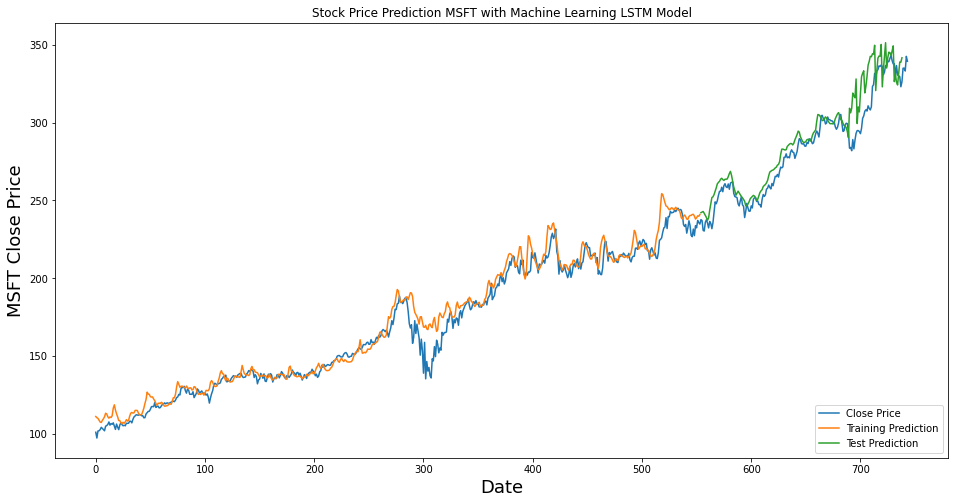

In [58]:
#look_back = 7
plt.figure(figsize=(16,8))
plt.title('Stock Price Prediction {0} with Machine Learning LSTM Model'.format(Ticker))
plt.xlabel('Date', fontsize=18)
plt.ylabel('{0} Close Price'.format(Ticker), fontsize=18)
plt.plot(all_close_values)
plt.plot(train_predict)
plt.plot(np.arange(len(test_predict)) + len(all_close_values_train), test_predict)
plt.legend(['Close Price', 'Training Prediction', 'Test Prediction'], loc='lower right')
plt.show() 

In [59]:
last_count_days = all_input_values[len(all_input_values)-count_day:]

In [60]:
last_count_days

array([[ 3.31640015e+02,  3.35799988e+02,  3.30100006e+02,
         3.10219000e+07,  4.03822265e-01,  2.03946916e-01,
         6.99700000e-01],
       [ 3.35309998e+02,  3.35500000e+02,  3.30799988e+02,
         2.47610000e+07,  3.92918568e-01,  1.56186381e-01,
         5.99400000e-01],
       [ 3.34410004e+02,  3.36489990e+02,  3.32119995e+02,
         2.22142000e+07,  3.67407751e-01,  6.56565657e-02,
         8.50500000e-01],
       [ 3.34980011e+02,  3.43000000e+02,  3.34790009e+02,
         3.80773000e+07,  4.84902597e-01,  7.32177397e-02,
         9.24600000e-01],
       [ 3.40679993e+02,  3.43790009e+02,  3.39079987e+02,
         2.88994000e+07,  4.69370535e-01,  2.52633038e-01,
        -1.77900000e-01]])

In [61]:
last_count_days.shape

(5, 7)

In [62]:
last_count_days= np.array(last_count_days)

In [63]:
last_count_days

array([[ 3.31640015e+02,  3.35799988e+02,  3.30100006e+02,
         3.10219000e+07,  4.03822265e-01,  2.03946916e-01,
         6.99700000e-01],
       [ 3.35309998e+02,  3.35500000e+02,  3.30799988e+02,
         2.47610000e+07,  3.92918568e-01,  1.56186381e-01,
         5.99400000e-01],
       [ 3.34410004e+02,  3.36489990e+02,  3.32119995e+02,
         2.22142000e+07,  3.67407751e-01,  6.56565657e-02,
         8.50500000e-01],
       [ 3.34980011e+02,  3.43000000e+02,  3.34790009e+02,
         3.80773000e+07,  4.84902597e-01,  7.32177397e-02,
         9.24600000e-01],
       [ 3.40679993e+02,  3.43790009e+02,  3.39079987e+02,
         2.88994000e+07,  4.69370535e-01,  2.52633038e-01,
        -1.77900000e-01]])

In [64]:
last_count_days.shape

(5, 7)

In [65]:
last_count_days = np.reshape(last_count_days,(1, (last_count_days.shape[0]*last_count_days.shape[1])))

In [66]:
last_count_days.shape

(1, 35)

In [67]:
prediction = model.predict(last_count_days)

In [68]:
prediction

array([[5.48234]], dtype=float32)

In [69]:
prediction  = scaler2.inverse_transform(prediction)

In [70]:
prediction

array([[390.65463]], dtype=float32)

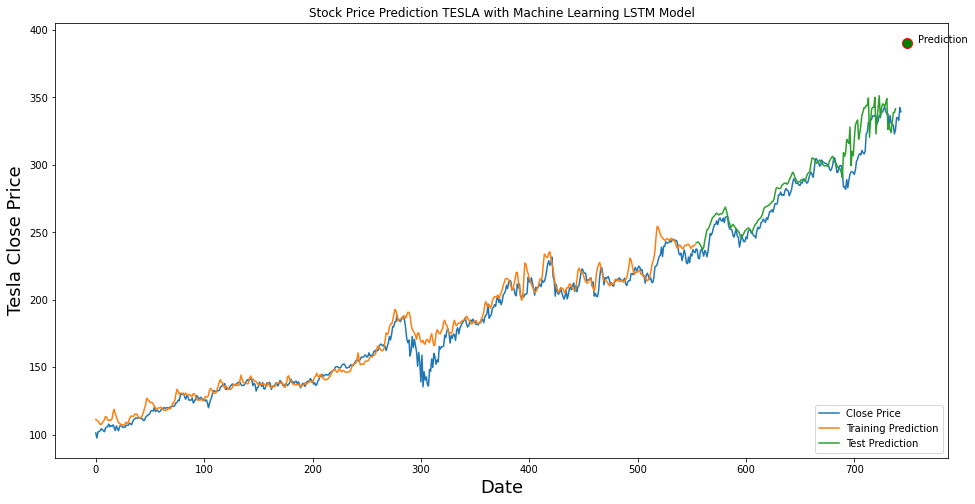

In [71]:
plt.figure(figsize=(16,8))
plt.title('Stock Price Prediction TESLA with Machine Learning LSTM Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Tesla Close Price', fontsize=18)
plt.plot(all_close_values)
plt.plot(train_predict)
plt.plot(np.arange(len(test_predict)) + len(all_close_values_train), test_predict)
plt.plot(len(all_input_values)+count_day, prediction, marker="o", markersize=10, markeredgecolor="red", markerfacecolor="green")
plt.annotate("Prediction",(len(all_input_values)+count_day+10, prediction))
plt.legend(['Close Price', 'Training Prediction', 'Test Prediction'], loc='lower right')
plt.show() 